In [1]:
import sys
import pennylane as qml
from pennylane import numpy as np
from math import pi
from sklearn import datasets
import scipy
import numpy as np
import time
import math
import pickle

In [2]:
file_name = "../PickleFiles/Data2Qubits.pkl"    #Saving data in a pickle file

open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()

dataVector = loaded_list[0]

In [3]:
numQubits = 2                  #No of qubits in the circuit
layers = 3
d = numQubits*layers
dev = qml.device("default.qubit", wires=numQubits)   

In [4]:
def make_feature_map(data):           
    for i in range(numQubits):
        qml.RZ(data[i], wires = i)
        
def add_layerRY(params):              #adds a layer of RY gates
    for qubit in range(numQubits):
        qml.RY(params[qubit], wires = qubit)
        
def make_variational_ckt(params):
    add_layerRY(params)
    #qml.CNOT(wires=[0,1])
    
def make_circuit(data, params, layers):
    for i in range(numQubits):
        qml.Hadamard(wires=i)
    for i in range(layers-1):
        make_feature_map(data)
        make_variational_ckt(params[i*numQubits:(i+1)*numQubits])
    make_feature_map(data)
    make_variational_ckt(params[len(params)-numQubits:])

In [5]:
@qml.qnode(dev)
def fubini_qnode(data, params, layers):          #Returns the state of the circuit as a matrix
    make_circuit(data, params, layers)
    return qml.state()

In [6]:
def fubini_calculate(data, params,depth):     #calculates fubini matrix given the data vector and parameters
    fubini = np.zeros([d, d], dtype=np.float64)
    base = np.conj(fubini_qnode(data,params,depth))
    for i in range(d):
        for j in range(d):
            params[i] += np.pi/2
            params[j] += np.pi/2
            plusplus = np.abs(np.dot(base, fubini_qnode(data, params,depth))) ** 2
            params[j] -= np.pi
            plusminus = np.abs(np.dot(base, fubini_qnode(data, params,depth))) ** 2
            params[i] -= np.pi
            minusminus = np.abs(np.dot(base, fubini_qnode(data, params,depth))) ** 2
            params[j] += np.pi
            minusplus = np.abs(np.dot(base, fubini_qnode(data, params,depth))) ** 2
            fubini[i, j] = (-plusplus-minusminus+plusminus+minusplus)/8
            params[i] += np.pi/2
            params[j] -= np.pi/2
    return fubini

In [7]:
paramsVector = []

for i in range(100):
    np.random.seed(i)
    params = np.random.uniform(-1,1,d)
    paramsVector.append(params)

In [8]:
fubini_matrices = []
avg_fubini = []

eigen_vals = []
avg_eigen = []

In [9]:
for i in range(100):
    print("Parameters", i)
    params = paramsVector[i]
    sum_matrices = 0
    for j in range(len(dataVector)):
        print(j)
        data = dataVector[j]
        fubini = fubini_calculate(data, params, layers)
        fubini_matrices.append(fubini)
        
        sum_matrices += fubini
        eigvals,eigvecs=scipy.linalg.eigh(fubini)
        eigen_vals.append(eigvals)
    sum_matrices /= len(dataVector)
    avg_fubini.append(sum_matrices)
    
    eigvals_avg,eigvecs_avg=scipy.linalg.eigh(avg_fubini[i])
    avg_eigen.append(eigvals_avg)

Parameters 0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Parameters 1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Parameters 2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Parameters 3
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
2

99
Parameters 27
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Parameters 28
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Parameters 29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Parameters 30
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


94
95
96
97
98
99
Parameters 54
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Parameters 55
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Parameters 56
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Parameters 57
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


89
90
91
92
93
94
95
96
97
98
99
Parameters 81
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Parameters 82
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Parameters 83
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Parameters 84
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [10]:
len(avg_eigen)

100

In [11]:
import pickle
file_name = "DataReupload23Normalwe.pkl"    #Saving data in a pickle file

open_file = open(file_name, "wb")
pickle.dump([paramsVector, dataVector,fubini_matrices, avg_fubini, eigen_vals, avg_eigen], open_file)
pickle.dump(fubini_matrices, open_file)
open_file.close()

In [12]:
import pickle
file_name = "DataReupload23Normalwe.pkl"    #Saving data in a pickle file

open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()

In [13]:
avg_eigen = loaded_list[5]

In [14]:
eigen_values = []
for i in range(len(avg_eigen)):
    for j in range(len(avg_eigen[0])):
        eigen_values.append(4*avg_eigen[i][j])       #Stores all the eigen_values, multiplication by 4 to match the Qiskit equivalent

In [15]:
len(eigen_values)

600

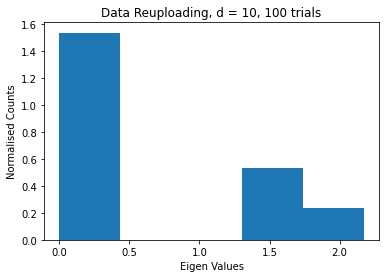

In [16]:
import matplotlib.pyplot as plt
plt.hist(eigen_values, bins = 5, density=True)
plt.title("Data Reuploading, d = 10, 100 trials")        #Eigen Values Distribution of 500 Fisher Matrices
plt.xlabel("Eigen Values")
plt.ylabel("Normalised Counts")
plt.show()